<a href="https://colab.research.google.com/github/ZKellock/MAT421/blob/main/MAT421ModuleB2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**17.4 Lagrange Polynomial Interpolation**
*   The Lagrange polynomial interpolation finds a single polynomial that intersects all of the given data points.
*   It is found by summing lagrange basis polynomials in the form $ P_i(x)=\frac{x-x_j}{x_i-x_j}$.
*   The resulting polynomial satisfies $L(x_i) = y_i$ for every point.

In [1]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

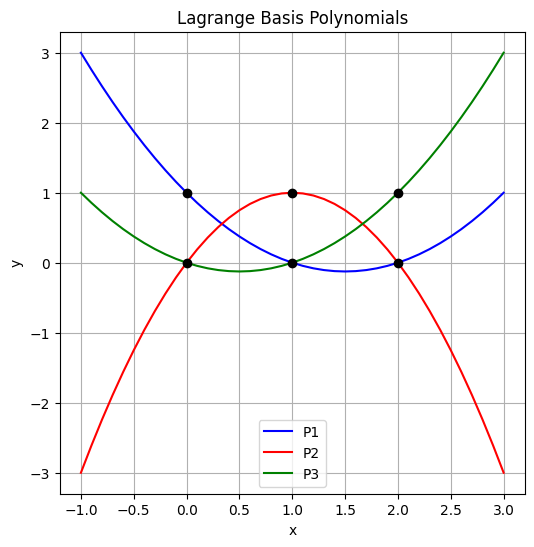

In [6]:
x = [0, 1, 2]
y = [1, 3, 2]

x = [0, 1, 2] ; y = [1, 3, 2]
P1_coeff = [1,-1.5,.5]  # 1/2*x^2 - 3/2*x + 1) = [0.5, -3/2, 1]
P2_coeff = [0, 2,-1]    # -x^2 + 2x         = [-1, 2, 0]
P3_coeff = [0,-.5,.5]   # 1/2*x^2 - 1/2*x)      = [0.5, -0.5, 0]

P1 = poly.Polynomial(P1_coeff)
P2 = poly.Polynomial(P2_coeff)
P3 = poly.Polynomial(P3_coeff)

x_new = np.arange(-1.0, 3.1, 0.1)
fig = plt.figure(figsize = (6,6))
plt.plot(x_new, P1(x_new), 'b', label = 'P1')
plt.plot(x_new, P2(x_new), 'r', label = 'P2')
plt.plot(x_new, P3(x_new), 'g', label = 'P3')

plt.plot(x, np.ones(len(x)), 'ko', x, np.zeros(len(x)), 'ko')
plt.title('Lagrange Basis Polynomials')
plt.xlabel('x'); plt.ylabel('y')
plt.grid(); plt.legend()
plt.show()

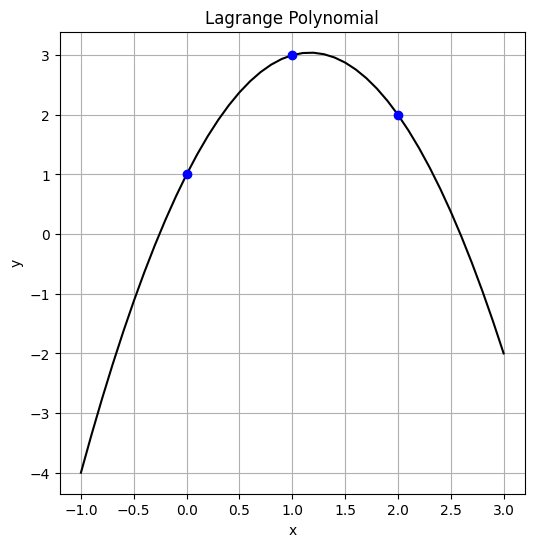

In [5]:
# Now summing the coefficients and the basis polynomials will yield the Lagrange Polynomial

# yi = [1, 3, 2]
L = 1*P1 + 3*P2 + 2*P3

fig = plt.figure(figsize = (6,6))
plt.plot(x_new, L(x_new), 'k', x, y, 'bo')
plt.title('Lagrange Polynomial') ; plt.grid()
plt.xlabel('x') ; plt.ylabel('y')
plt.show()

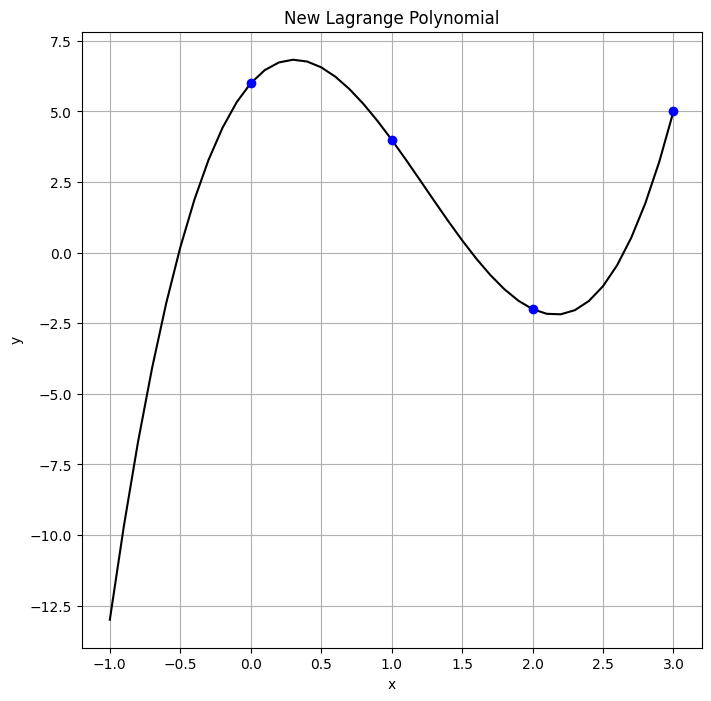

In [11]:
# In this example, scipy is used to avoid the tedious manual calculations of all the coefficients

from scipy.interpolate import lagrange

x_n = [0, 1, 2, 3] ; y_n = [6, 4, -2, 5]
f = lagrange(x_n, y_n) # f = the lagrange function given new x and y sets

fig2 = plt.figure(figsize = (8,8))
plt.plot(x_new, f(x_new), 'k', x_n, y_n, 'bo')
plt.title('New Lagrange Polynomial') ; plt.grid()
plt.xlabel('x') ; plt.ylabel('y')
plt.show()

**17.5 Newton's Polynomial Interpolation**
*   The Newton's polynomial interpolation follows the general form of $Σ_{i=0}^na_in_i(x)$
*   The coefficients for this method are much simpler to calculate than with Lagrange interpolation.

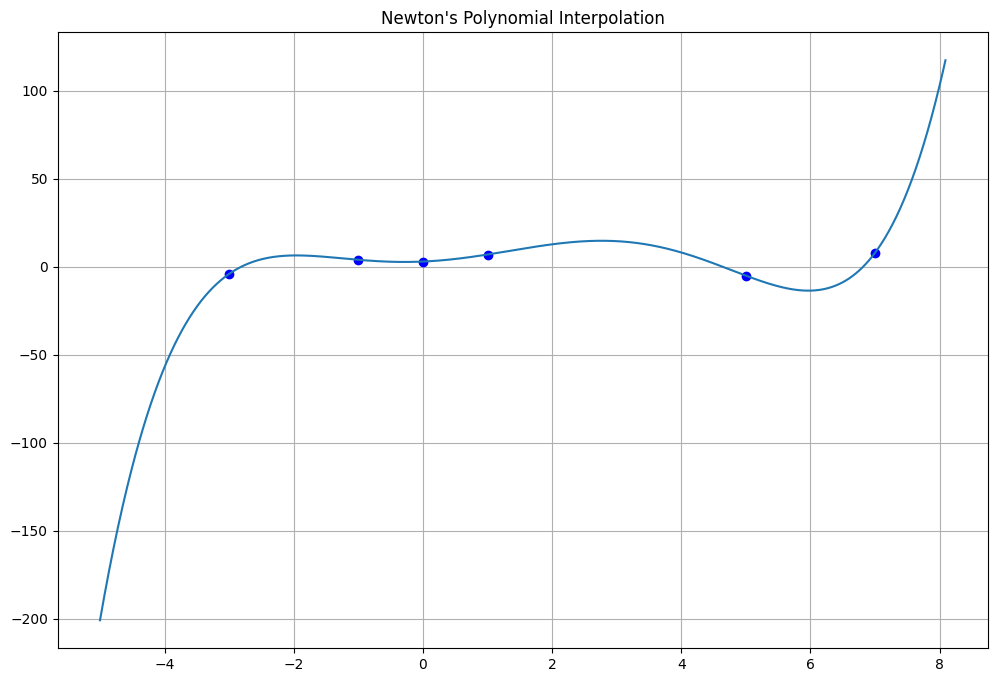

In [15]:
def divided_diff(x, y):
    '''
    function to calculate the divided differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    coef[:,0] = y

    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
    return coef

def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial at x
    '''
    n = len(x_data) - 1
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

x = np.array([-3, -1, 0, 1, 5, 7])
y = np.array([-4, 4, 3, 7, -5, 8])

a_s = divided_diff(x, y)[0, :] # Calculating coefficients via the divided difference

plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)
plt.title("Newton's Polynomial Interpolation") ; plt.grid()
plt.show()